import libraries

In [1357]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Import table from csv file

In [1358]:
My_DF = pd.read_csv("MyTable.csv")
My_DF

,Order ID,Segment,Order Priority,Market,Shipping_cost_sum,Category_Furniture,Category_officeSup,Category_Technology,City,State,Country,Region,Ship Mode
0,CA-2011-128055,Consumer,Medium,US,58.129999,0,1,0,San Francisco,California,United States,West,Standard Class
1,CA-2011-138100,Consumer,Medium,US,2.300000,1,1,0,New York City,New York,United States,East,Standard Class
2,CA-2012-121391,Consumer,Critical,US,5.230000,0,1,0,San Francisco,California,United States,West,First Class
3,CA-2013-103982,Consumer,Medium,US,285.719998,0,1,1,Round Rock,Texas,United States,Central,Standard Class
4,CA-2014-147039,Consumer,Medium,US,31.220000,0,1,0,Minneapolis,Minnesota,United States,Central,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25028,IT-2012-4926272,Consumer,Medium,EU,72.709999,1,0,0,Berlin,Berlin,Germany,Central,Standard Class
25029,MX-2012-105662,Consumer,Low,LATAM,9.110000,1,0,0,Toluca,México,Mexico,North,Standard Class
25030,MX-2013-141698,Consumer,High,LATAM,68.222000,0,0,1,Rondonópolis,Mato Grosso,Brazil,South,Second Class
25031,MX-2014-168550,Consumer,Critical,LATAM,106.680000,0,0,1,Madero,Tamaulipas,Mexico,North,Second Class


In [1359]:
My_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25033 entries, 0 to 25032
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             25033 non-null  object 
 1   Segment              25033 non-null  object 
 2   Order Priority       25033 non-null  object 
 3   Market               25033 non-null  object 
 4   Shipping_cost_sum    25033 non-null  float64
 5   Category_Furniture   25033 non-null  int64  
 6   Category_officeSup   25033 non-null  int64  
 7   Category_Technology  25033 non-null  int64  
 8   City                 25033 non-null  object 
 9   State                25033 non-null  object 
 10  Country              25033 non-null  object 
 11  Region               25033 non-null  object 
 12  Ship Mode            25033 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 2.5+ MB


As seen in the above, we don't have any null values in our dataset, so there is no need for handling or filling null values

In [1360]:
My_DF.describe(include = 'all')

,Order ID,Segment,Order Priority,Market,Shipping_cost_sum,Category_Furniture,Category_officeSup,Category_Technology,City,State,Country,Region,Ship Mode
count,25033,25033,25033,25033,25033.000000,25033.000000,25033.000000,25033.000000,25033,25033,25033,25033,25033
unique,25033,3,4,7,NaN,NaN,NaN,NaN,3590,1089,147,13,4
top,CA-2011-128055,Consumer,Medium,APAC,NaN,NaN,NaN,NaN,New York City,California,United States,Central,Standard Class
freq,1,12957,14344,5437,NaN,NaN,NaN,NaN,448,1016,4990,5238,15011
mean,NaN,NaN,NaN,NaN,51.670302,0.319179,0.755802,0.324931,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,93.252594,0.466168,0.429619,0.468358,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.002000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.400000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,18.224000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,56.180002,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN


Feature engineering

In [1361]:
print(My_DF['Region'].value_counts(), "\n")
print(My_DF['Segment'].value_counts())
# I looked at other columns value counts too

Region
Central           5238
South             3263
EMEA              2462
North             2351
Africa            2230
Oceania           1744
West              1605
Southeast Asia    1517
East              1394
North Asia        1150
Central Asia      1026
Caribbean          852
Canada             201
Name: count, dtype: int64 

Segment
Consumer       12957
Corporate       7500
Home Office     4576
Name: count, dtype: int64


I looked up in internet and normally 'Same day' is the fastest and the most expensive type of delivery, after that comes the 'First class' and then 'second class', and finally the 'Standard class' is the cheapest and the slowest type of them all

In [1362]:
# I calculated the average shipping cost for each ship mode and tested my theory
price_1 = My_DF[My_DF['Ship Mode'] == 'Standard Class']['Shipping_cost_sum'].mean()
price_2 = My_DF[My_DF['Ship Mode'] == 'Second Class']['Shipping_cost_sum'].mean()
price_3 = My_DF[My_DF['Ship Mode'] == 'First Class']['Shipping_cost_sum'].mean()
price_4 = My_DF[My_DF['Ship Mode'] == 'Same Day']['Shipping_cost_sum'].mean()
print("Average shipping cost for Standard Class: ", price_1)
print("Average shipping cost for Second Class: ", price_2)
print("Average shipping cost for First Class: ", price_3)
print("Average shipping cost for Same Day: ", price_4)

Average shipping cost for Standard Class:  39.348394727471586
Average shipping cost for Second Class:  60.14468964153697
Average shipping cost for First Class:  78.65379415860428
Average shipping cost for Same Day:  83.9562747045928


As we can see My observation checks out and is likely valid so i'm gonna classiify them in tiers

In [1363]:
# New dataset after Feature Engineering 
FE_df = My_DF.copy()
FE_df['Order Priority'] = FE_df['Order Priority'].map({'Low':1, 'Medium':2, 'High':3, 'Critical':4})

# According to my observation in costing : Same Day > First Class > Second Class > Standard Class 
FE_df['Ship Mode'] = FE_df['Ship Mode'].map({'Standard Class':1, 'Second Class':2, 'First Class':3, 'Same Day':4})


In [1364]:
# In here I One-hot encooded the 'Segment' column
FE_df = pd.get_dummies(FE_df, columns=['Segment'], drop_first=True)

In this part I tested if we can reduce outliers in costing and improve our model

In [1365]:
My_DF['Shipping_cost_sum'].describe()
# As we can see the shipping cost probably has some outliers in the upperend because the max value is way higher than the 75th percentile

count    25033.000000
mean        51.670302
std         93.252594
min          0.002000
25%          5.400000
50%         18.224000
75%         56.180002
max       2076.620026
Name: Shipping_cost_sum, dtype: float64

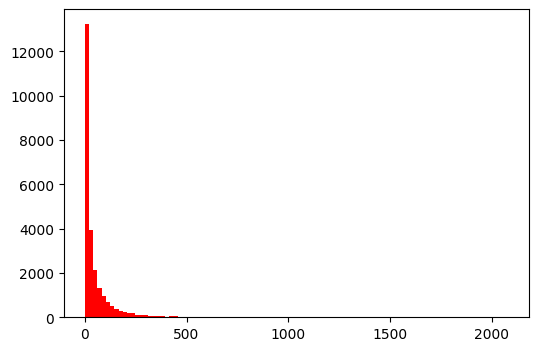

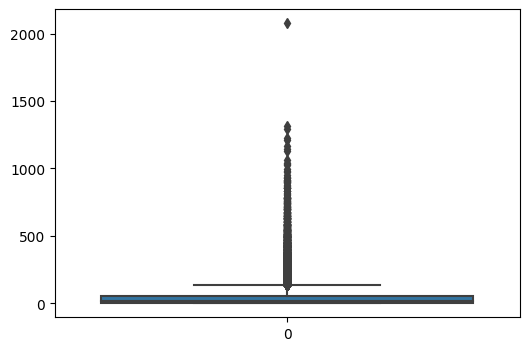

In [1366]:
plt.figure(figsize = (6,4))
plt.hist(My_DF['Shipping_cost_sum'],bins = 100 ,color = 'red')
plt.figure(figsize = (6,4))
sns.boxplot(My_DF['Shipping_cost_sum'])
plt.show()

We have so many outliers in the upper end and the plot is clearly right skewed

In [1367]:
np.percentile(My_DF['Shipping_cost_sum'], [75, 95, 99, 100])

array([  56.18000156,  215.24339976,  470.86040806, 2076.62002563])

In [1368]:
cost_threshold = np.percentile(FE_df['Shipping_cost_sum'], 93)
FE_df = FE_df[FE_df['Shipping_cost_sum'] <= cost_threshold]

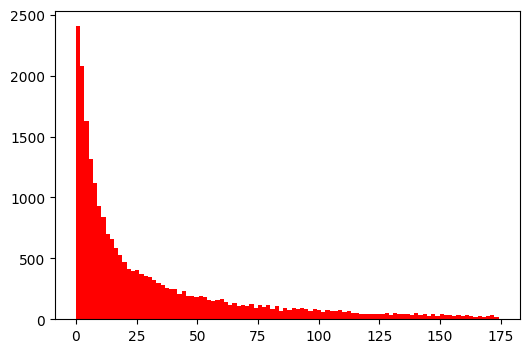

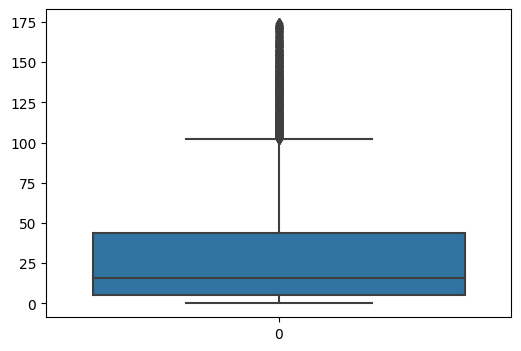

In [1369]:
plt.figure(figsize = (6,4))
plt.hist(FE_df['Shipping_cost_sum'],bins = 100 ,color = 'red')
plt.figure(figsize = (6,4))
sns.boxplot(FE_df['Shipping_cost_sum'])
plt.show()


In [1370]:
price_1 = FE_df[FE_df['Ship Mode'] == 1]['Shipping_cost_sum'].mean()
price_2 = FE_df[FE_df['Ship Mode'] == 2]['Shipping_cost_sum'].mean()
price_3 = FE_df[FE_df['Ship Mode'] == 3]['Shipping_cost_sum'].mean()
price_4 = FE_df[FE_df['Ship Mode'] == 4]['Shipping_cost_sum'].mean()
print("Average shipping cost for Standard Class: ", price_1)
print("Average shipping cost for Second Class: ", price_2)
print("Average shipping cost for First Class: ", price_3)
print("Average shipping cost for Same Day: ", price_4)

Average shipping cost for Standard Class:  28.4430571990348
Average shipping cost for Second Class:  34.51478054372777
Average shipping cost for First Class:  38.46419746892537
Average shipping cost for Same Day:  37.666076542688636


In [1371]:
FE_df.head()

,Order ID,Order Priority,Market,Shipping_cost_sum,Category_Furniture,Category_officeSup,Category_Technology,City,State,Country,Region,Ship Mode,Segment_Corporate,Segment_Home Office
0,CA-2011-128055,2,US,58.129999,0,1,0,San Francisco,California,United States,West,1,False,False
1,CA-2011-138100,2,US,2.300000,1,1,0,New York City,New York,United States,East,1,False,False
2,CA-2012-121391,4,US,5.230000,0,1,0,San Francisco,California,United States,West,3,False,False
4,CA-2014-147039,2,US,31.220000,0,1,0,Minneapolis,Minnesota,United States,Central,1,False,False
5,ES-2012-2960821,2,EU,167.350006,1,0,0,Parla,Madrid,Spain,South,1,False,False


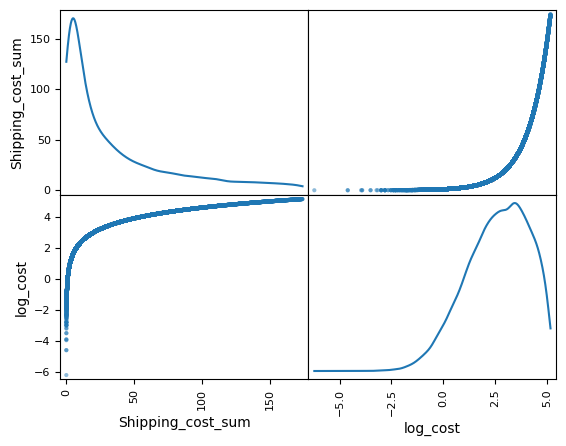

In [1372]:
new_Df = pd.DataFrame()
new_Df['Shipping_cost_sum'] = FE_df['Shipping_cost_sum']
new_Df['log_cost'] = np.log(new_Df['Shipping_cost_sum'])
pd.plotting.scatter_matrix(new_Df, diagonal='kde')
FE_df['log_cost'] = new_Df['log_cost']

In [1373]:
X = FE_df.copy()
X = X.drop(['Order ID','Ship Mode','Shipping_cost_sum'], axis = 1)
y = FE_df['Ship Mode']

In [1374]:
X

,Order Priority,Market,Category_Furniture,Category_officeSup,Category_Technology,City,State,Country,Region,Segment_Corporate,Segment_Home Office,log_cost
0,2,US,0,1,0,San Francisco,California,United States,West,False,False,4.062682
1,2,US,1,1,0,New York City,New York,United States,East,False,False,0.832909
2,4,US,0,1,0,San Francisco,California,United States,West,False,False,1.654411
4,2,US,0,1,0,Minneapolis,Minnesota,United States,Central,False,False,3.441059
5,2,EU,1,0,0,Parla,Madrid,Spain,South,False,False,5.120087
...,...,...,...,...,...,...,...,...,...,...,...,...
25028,2,EU,1,0,0,Berlin,Berlin,Germany,Central,False,False,4.286479
25029,1,LATAM,1,0,0,Toluca,México,Mexico,North,False,False,2.209373
25030,3,LATAM,0,0,1,Rondonópolis,Mato Grosso,Brazil,South,False,False,4.222767
25031,4,LATAM,0,0,1,Madero,Tamaulipas,Mexico,North,False,False,4.669834


In [1375]:
X['Segment_Home Office'] = X['Segment_Home Office'].map({True:1, False:0})
X['Segment_Corporate'] = X['Segment_Corporate'].map({True:1, False:0})

In [1376]:
X

,Order Priority,Market,Category_Furniture,Category_officeSup,Category_Technology,City,State,Country,Region,Segment_Corporate,Segment_Home Office,log_cost
0,2,US,0,1,0,San Francisco,California,United States,West,0,0,4.062682
1,2,US,1,1,0,New York City,New York,United States,East,0,0,0.832909
2,4,US,0,1,0,San Francisco,California,United States,West,0,0,1.654411
4,2,US,0,1,0,Minneapolis,Minnesota,United States,Central,0,0,3.441059
5,2,EU,1,0,0,Parla,Madrid,Spain,South,0,0,5.120087
...,...,...,...,...,...,...,...,...,...,...,...,...
25028,2,EU,1,0,0,Berlin,Berlin,Germany,Central,0,0,4.286479
25029,1,LATAM,1,0,0,Toluca,México,Mexico,North,0,0,2.209373
25030,3,LATAM,0,0,1,Rondonópolis,Mato Grosso,Brazil,South,0,0,4.222767
25031,4,LATAM,0,0,1,Madero,Tamaulipas,Mexico,North,0,0,4.669834


In [1377]:
Categorical_cols = X[['Market','City','State','Country','Region']]
Numerical_col = X[['log_cost','Order Priority','Category_Furniture','Category_officeSup','Category_Technology','Segment_Corporate','Segment_Home Office']]

In [1378]:
label_encoder = LabelEncoder()
for col in Categorical_cols.columns:
    Categorical_cols[col] = label_encoder.fit_transform(Categorical_cols[col])
X = pd.concat([Categorical_cols, Numerical_col], axis=1)
X

C:\Users\Asus\AppData\Local\Temp\ipykernel_16992\4174029699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical_cols[col] = label_encoder.fit_transform(Categorical_cols[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16992\4174029699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical_cols[col] = label_encoder.fit_transform(Categorical_cols[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16992\4174029699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Market,City,State,Country,Region,log_cost,Order Priority,Category_Furniture,Category_officeSup,Category_Technology,Segment_Corporate,Segment_Home Office
0,6,2749,191,138,12,4.062682,2,0,1,0,0,0
1,6,2212,696,138,6,0.832909,2,1,1,0,0,0
2,6,2749,191,138,12,1.654411,4,0,1,0,0,0
4,6,2054,644,138,3,3.441059,2,0,1,0,0,0
5,4,2367,583,118,10,5.120087,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25028,4,368,144,46,3,4.286479,2,1,0,0,0,0
25029,5,3128,671,80,7,2.209373,1,1,0,0,0,0
25030,5,2650,624,17,10,4.222767,3,0,0,1,0,0
25031,5,1886,952,80,7,4.669834,4,0,0,1,0,0


In [1379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [1380]:
def normalize_features(X):
   X = (X - X.mean()) / X.std()
   return X

In [1381]:
X_train = normalize_features(X_train)
X_test = normalize_features(X_test)

In [1382]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 41, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [1383]:
print("Classification report:\n")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Classification report:

              precision    recall  f1-score   support

           1       0.70      0.90      0.79      2958
           2       0.28      0.15      0.20       861
           3       0.32      0.19      0.24       612
           4       0.06      0.01      0.02       225

    accuracy                           0.62      4656
   macro avg       0.34      0.31      0.31      4656
weighted avg       0.54      0.62      0.57      4656

Accuracy: 62.35%


XGBoost

In [1384]:
model_xgboost = XGBClassifier(
    booster='dart',
    n_estimators = 50,
    learning_rate = 0.01,
    tree_method='approx',
    max_depth=15,
    reg_alpha=1,
    reg_lambda=1,
)

In [1385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [1386]:
y_train = y_train - 1
y_test = y_test - 1

In [1387]:
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [1388]:
y_pred = model_xgboost.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Classification report:

              precision    recall  f1-score   support

           0       0.70      0.94      0.80      2958
           1       0.29      0.11      0.16       861
           2       0.30      0.16      0.21       612
           3       0.17      0.02      0.04       225

    accuracy                           0.64      4656
   macro avg       0.37      0.31      0.30      4656
weighted avg       0.54      0.64      0.57      4656

Accuracy: 63.81%


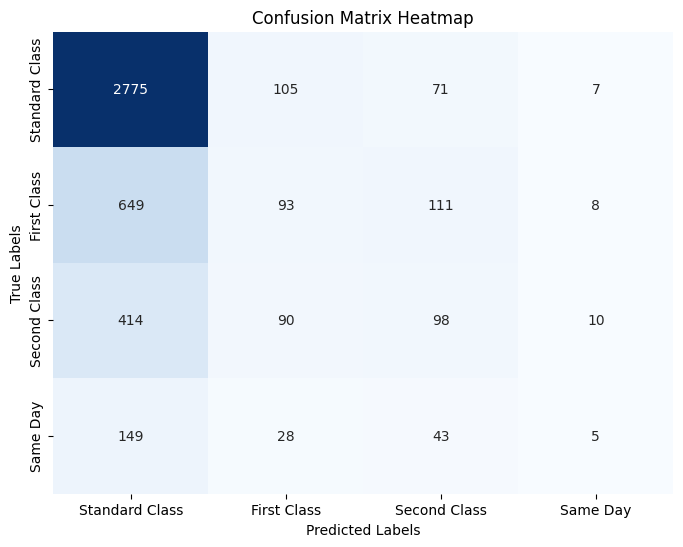

In [1389]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=My_DF['Ship Mode'].unique(), yticklabels=My_DF['Ship Mode'].unique())

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

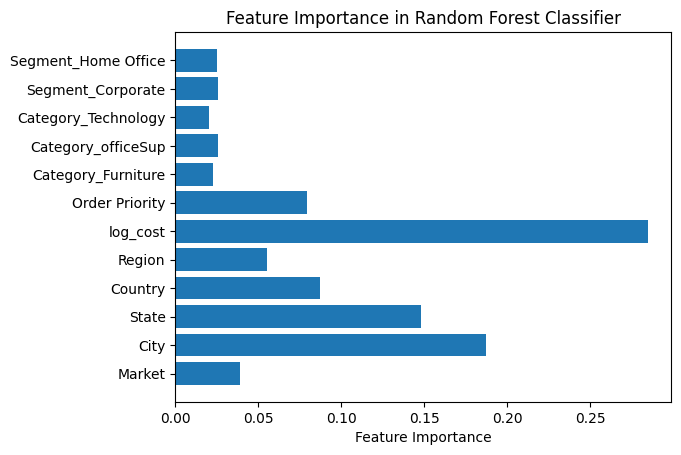

In [1390]:
feature_importances = classifier.feature_importances_

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()